In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import seaborn as sns

pylab.rcParams['figure.figsize'] = 12,8

# Machine Learning with Python

Machine learning is a subset of the field of artificial intelligence that seeks to create computer systems that effectively perform specified tasks without explicit human instruction. It is a heavily data-driven application that is based on the scientific study of algorithms and statistical models.

There are a variety of machine learning techniques, including:

* Regression/Estimation: predicting continuous variables
* Classification: predicting binary outcomes
* Clustering: finding/summarizing similar data
* Associations: linking frequent co-occurrences
* Anomaly Detection: identifying outliers
* Sequence Mining: predicting next events
* Dimension Reduction: reducing the number of random variables (ex: PCA)
* Recommendation Systems: suggesting items based on historical preferences

## Supervised vs. Unsupervised Learning

Supervised models are "taught" in a controlled environment using historical labeled datasets with the goal of predicting future outcomes. When viewing a labeled dataset, column headers are referred to as "attributes", while column themselves are referred to as "features". Data in any one cell in a column can be either numeric or categorical. Finally, each row, or observation, corresponds to a single occurrence posessing all of the attributes. The two main types of supervised learning techniques are classification and regression.

Unsupervised models independently discover relevant information using an unlabeled dataset. These algorithms tend to be more complex, have fewer evaluation methods and operate in a less controlled environment. Common methods include dimension reduction, density estimation, market basket analysis and clustering.


#### Regression

Regression models can be classified based on a) the number of independent variables and b) the nature of the relationship between independent and dependent variables:

* **Simple Regression** (1 independent variable): $\hat{y} = \theta_0 + \theta_{1}x_1$
    * Simple Linear Regression
    * Simple Non-Linear Regression
* **Multiple Regression** (>1 independent variables): $\hat{y} = \theta_0 + \theta_{1}x_1 + \theta_{2}x_2\;+\; ... +\;\theta_{n}x_n = \theta^TX$ (a hyperplane)
    * Multiple Linear Regression
    * Multiple Non-Linear Regression
    
For simple regression, it is easy to calculate the optimum $\theta$ values either formulaically or via optimization. Computation becomes more difficult and resource intensive for multiple regression. Although linear algebra operations can be applied to smaller datasets, an optimization approach such as gradient descent, stochastic gradient descent or Newton's method should be used when the number of rows exceeds 10k or when performing multiple linear regression.

Linear regression has many benefits. For one, it's fast and easy to understand. It also does not require the tuning of parameters. However, there are many other types of regression algorithms, including:

* Ordinal regression
* Poisson regression
* Fast forest quantile regression
* Linear, polynomial, lasso, stepwise, ridge regression
* Bayesian linear regression
* Neural network regression
* Decision forest regression
* Boosted decision tree regression
* KNN (K-nearest neighbors)

The fundamental compromise of fitting regression models is the trade-off between training accuracy and out-of-sample accuracy. Although it is desirable to use all data available when training a model, training and testing using the same dataset has its drawbacks. Typically, this method results in high training accuracy but tends to "over-fit" the data, capturing noise rather than the underlying process. Thus, when applied to new data, these non-generalized models can be highly inaccurate.

Train/test split provides a more accurate evaluation of out-of-sample data. Models are trained and tested on mutually exclusive segments of the dataset. Unfortunatley this method also has its drawbacks, including being highly dependent on which segments are chosen as training vs. test data. Happily, K-fold cross-validation minimizes many of the shortcomings of the train/test split method. In this technique, results from multiple iterations of train/test splits are averaged to produce a more consistent out-of-sample accuracy.

**Model evaluation metrics** are used to assess fit and hone models. In this context, error refers to the difference between actual and predicted values. There are several different ways to calculate the error of a model:

* Mean Absolute Error: $MAE = \frac{1}{n}\sum_{i=1}^{n}|y_i-\hat{y}_i|$ *\*easiest to understand*
* Mean Squared Error: $MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y}_i)^2$ *\*geared towards larger errors*
* Root Mean Squared Error: $RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y}_i)^2}$ *\*interpretable in the same units as the response variable*
* Relative Absolute Error aka Residual Sum of Squares: $RAE = \frac{\sum_{i=1}^{n}|y_i-\hat{y}_i|}{\sum_{i=1}^{n}|y_i-\bar{y}_i|}$ *\*normalizes total absolute error by dividing by total absolute error*
* Relative Squared Error: $RSE = \frac{\sum_{i=1}^{n}(y_i-\hat{y}_i)^2}{\sum_{i=1}^{n}(y_i-\bar{y}_i)^2}$ *\*used to calculate $R^2$*
* Coefficient of Determination aka $R^2$: $R^2 = 1 - RSE$

#### Load Dataset

In [60]:
df = pd.read_csv("assets/FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


#### Extract Relevant Variables

In [61]:
car_df = df[["CYLINDERS", "ENGINESIZE", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
car_df.head()

,CYLINDERS,ENGINESIZE,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,4,2.0,8.5,196
1,4,2.4,9.6,221
2,4,1.5,5.9,136
3,6,3.5,11.1,255
4,6,3.5,10.6,244


#### Visualize Variables

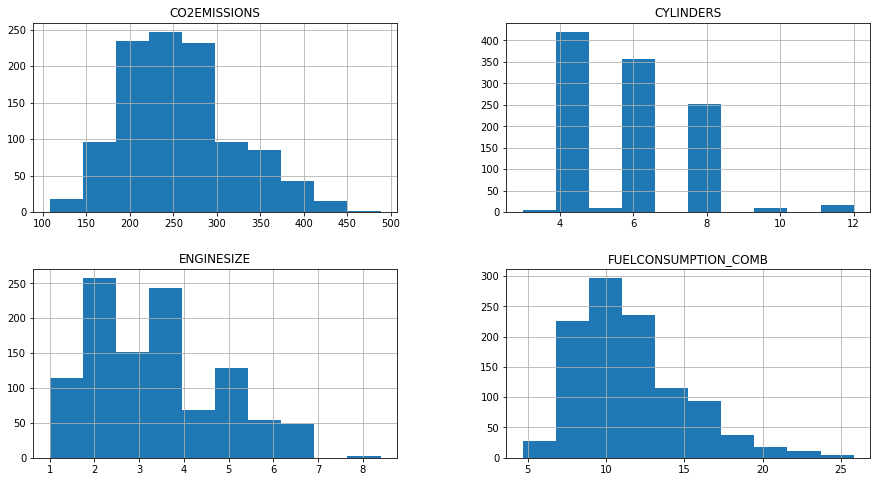

In [62]:
car_df.hist(figsize=(15,8))
plt.show()

#### Create Train & Test Datasets

In [63]:
# Method 1
mask = np.random.rand(len(car_df)) < 0.8
train = car_df[mask] # 80% for training
test = car_df[~mask] # 20% for testing

print("Number of training samples:", train.shape[0])
print("Number of testing samples:", test.shape[0])

Number of training samples: 838
Number of testing samples: 229


In [64]:
# Method 2
y = car_df["CO2EMISSIONS"]
x = car_df.drop("CO2EMISSIONS", axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) # The benefit is that with random_state, groups are fixed

print("Number of training samples:", x_train.shape[0])
print("Number of testing samples:", x_test.shape[0])

Number of training samples: 853
Number of testing samples: 214


#### Fit a Simple Linear Regression Model

Simple linear regression models attempt to fit a line to a dataset that represents a fundamentally linear signal (plus noise).

Estimated Linear Model Paramters => Intercept: 3.12 | 4.96


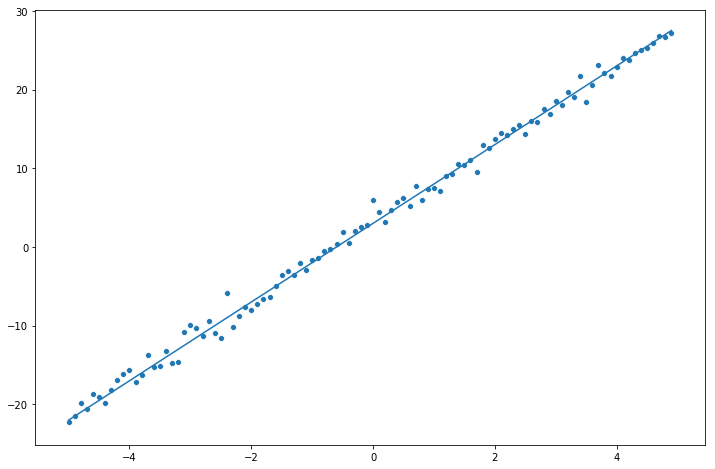

In [98]:
slope = 5
intercept = 3

x = np.arange(-5, 5, 0.1)
y = intercept + slope * x
y_noise = np.random.normal(size=x.size)
ydata = y + y_noise

sns.lineplot(x, y) # Underlying signal
sns.scatterplot(x, ydata) # Noise

lm = LinearRegression()
lm.fit(x.reshape(-1, 1), ydata)
print("Estimated Linear Model Paramters => Intercept: {:0.2f} | {:0.2f}".format(lm.intercept_, lm.coef_[0]))

In [65]:
# Method 1
lm = LinearRegression()
lm.fit(train[["ENGINESIZE"]], train["CO2EMISSIONS"])
print("Coefficient:", lm.coef_, "Intercept:", lm.intercept_)

Coefficient: [38.29377202] Intercept: 127.1757884602601


In [66]:
# Method 2
lm = LinearRegression()
lm.fit(x_train[["ENGINESIZE"]], y_train)
print("Coefficient:", lm.coef_, "Intercept:", lm.intercept_)

Coefficient: [39.24838431] Intercept: 126.1892015472493


#### Plot Regression Line

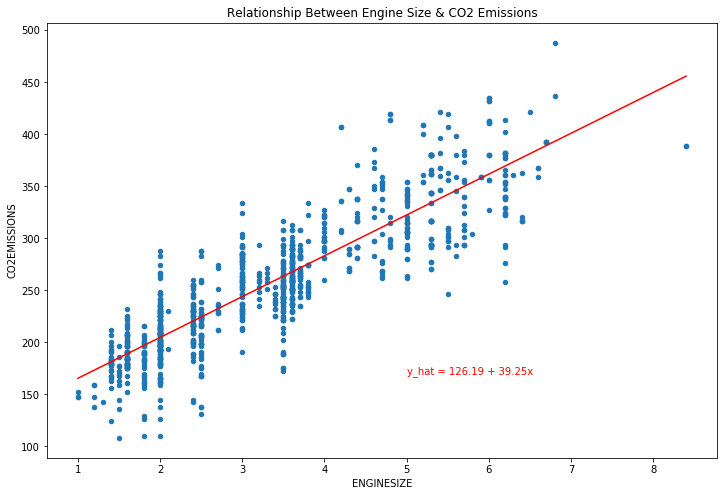

In [67]:
car_df.plot(kind="scatter", x="ENGINESIZE", y="CO2EMISSIONS")
x_min = car_df["ENGINESIZE"].min()
x_max = car_df["ENGINESIZE"].max()
x_range = np.linspace(x_min, x_max, 1000)
plt.plot(x_range, lm.intercept_ + lm.coef_[0] * x_range, color='r')
label = "y_hat = " + str(round(lm.intercept_,2)) + " + " + str(round(lm.coef_[0],2)) + "x"
plt.annotate(label, xy=(5, 170), color='r')

plt.title("Relationship Between Engine Size & CO2 Emissions")
plt.show()

#### Evaluate Regression Model

In [68]:
y_hat = lm.predict(x_test[["ENGINESIZE"]])
r2 = lm.score(x_test[["ENGINESIZE"]], y_test) # Note this takes as input test x and test y
r2_v2 = r2_score(y_test, y_hat) # Note this takes as input the test y and the predicted y

mse = mean_squared_error(y_test, y_hat)

print("Two ways to calculate R2: {:0.2f}, {:0.2f}".format(r2, r2_v2))
print("MSE:", mse)

Two ways to calculate R2: 0.72, 0.72
MSE: 1181.528809303555


#### Fit a Multiple Linear Regression Model

As with simple linear regression, multiple linear regression involves estimating the intercept and coefficient of each indenpendent variable. Rather than define a line, however, these parameters define the hyperplane of best fit.

In [69]:
features = ['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']
lm = LinearRegression()
lm.fit(x_train[features], y_train)
print("Coefficient:", lm.coef_, "Intercept:", lm.intercept_)

Coefficient: [11.98993058  7.54469599  8.98695981] Intercept: 69.05220992553777


In [71]:
y_hat = lm.predict(x_test[features])
r2 = r2_score(y_test.array, y_hat)

mse = mean_squared_error(y_test, y_hat)

print("R2: {:0.2f}".format(r2))
print("MSE: {:0.2f}".format(mse))

R2: 0.86
MSE: 589.24


#### Fit a Polynomial Regression Model

Polynomial regression involves fitting a model in the form of an nth degree polynomial: $\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2^2 + ... + \theta_nx_n^n$. This is done using a Scikit-learn method called ```fit_transform()```, which derives a new feature set from the existing feature set and, in doing so, reduces the problem to one involving simple linear regression. The number of features that are generated depend on the degree of the polynomial; for example, transforming a third degree polynomial would require 4 sets of features.

A residual plot is an easy way to visualize the relationship between variables. Residuals that vary along the x axis indicate a measure of non-linearity.

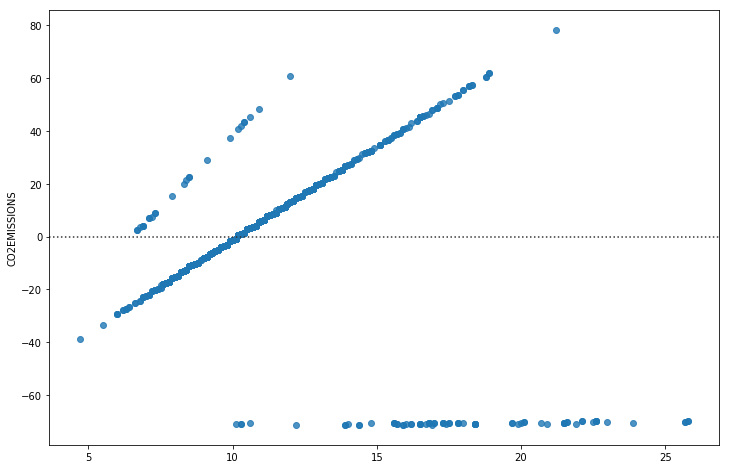

In [72]:
sns.residplot(x_train[['FUELCONSUMPTION_COMB']], y_train)
plt.show()

In [78]:
poly = PolynomialFeatures(degree=3)
x_train_trans = poly.fit_transform(x_train[['FUELCONSUMPTION_COMB']])
x_test_trans = poly.fit_transform(x_test[['FUELCONSUMPTION_COMB']])

lm = LinearRegression()
lm.fit(x_train_trans, y_train)

y_hat = lm.predict(x_test_trans)
print("MSE: ", mean_squared_error(y_test, y_hat))
print("R2: ", r2_score(y_test, y_hat))

MSE:  469.1296167212955
R2:  0.8888709628290828
